In [1]:
import pandas as pd
from ggplot import *
import numpy as np
import seaborn as sns
%matplotlib inline

C:\Users\v-avkama\AppData\Local\Continuum\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\v-avkama\AppData\Local\Continuum\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\v-avkama\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
dat1 = pd.read_excel("training_fact.xlsx")

In [3]:
dat2 = pd.read_excel("training_type.xlsx")

In [4]:
dat1.head()

,businessID,traingID,Credits,quarterID,CompletedMonth
0,1000000603,30477,5,9,3
1,1000000603,207232,15,10,5
2,1000000603,207237,6,10,5
3,1000000603,207238,12,10,5
4,1000000649,22692,5,13,1


In [5]:
dat2.head()

,traingID,traingFormatID,GenNum
0,13728,2,0
1,13741,2,0
2,13768,2,0
3,13770,2,0
4,13775,2,0


In [6]:
dat1.shape

(1000, 5)

In [7]:
dat2.shape

(1000, 3)

In [8]:
dat3 = dat1.merge(dat2,how = "left",on= "traingID")

In [9]:
dat3.head()

,businessID,traingID,Credits,quarterID,CompletedMonth,traingFormatID,GenNum
0,1000000603,30477,5,9,3,NaN,NaN
1,1000000603,207232,15,10,5,NaN,NaN
2,1000000603,207237,6,10,5,NaN,NaN
3,1000000603,207238,12,10,5,NaN,NaN
4,1000000649,22692,5,13,1,NaN,NaN


In [10]:
sum(pd.isnull(dat3['GenNum']) == True)

926

In [11]:
dat3.dropna().shape

(74, 7)

In [12]:
#Number of trainings each businessID has taken
dat3.groupby('businessID')['traingID'].count().head()

businessID
1000000603     4
1000000649    11
1000000910    10
1000000985    10
1000001035    30
Name: traingID, dtype: int64

In [13]:
dat3.groupby('businessID')['Credits'].agg(['count','min','max','sum','mean','median']).head()

,count,min,max,sum,mean,median
businessID,,,,,,
1000000603,4,5,15,38,9.500000,9.0
1000000649,11,5,5,55,5.000000,5.0
1000000910,10,5,5,50,5.000000,5.0
1000000985,10,5,6,58,5.800000,6.0
1000001035,30,2,6,148,4.933333,5.0


In [14]:
dat3.groupby('businessID')['Credits'].agg(['count','min','max','sum','mean','median']).head()

,count,min,max,sum,mean,median
businessID,,,,,,
1000000603,4,5,15,38,9.500000,9.0
1000000649,11,5,5,55,5.000000,5.0
1000000910,10,5,5,50,5.000000,5.0
1000000985,10,5,6,58,5.800000,6.0
1000001035,30,2,6,148,4.933333,5.0


In [15]:
dat3.head()

,businessID,traingID,Credits,quarterID,CompletedMonth,traingFormatID,GenNum
0,1000000603,30477,5,9,3,NaN,NaN
1,1000000603,207232,15,10,5,NaN,NaN
2,1000000603,207237,6,10,5,NaN,NaN
3,1000000603,207238,12,10,5,NaN,NaN
4,1000000649,22692,5,13,1,NaN,NaN


In [16]:
temp = pd.DataFrame(dat3.groupby(['businessID'])['quarterID'].min()).reset_index()

In [17]:
dat3 = dat3.merge(temp,on = ['businessID'])

In [18]:
dat3.head()

,businessID,traingID,Credits,quarterID_x,CompletedMonth,traingFormatID,GenNum,quarterID_y
0,1000000603,30477,5,9,3,NaN,NaN,9
1,1000000603,207232,15,10,5,NaN,NaN,9
2,1000000603,207237,6,10,5,NaN,NaN,9
3,1000000603,207238,12,10,5,NaN,NaN,9
4,1000000649,22692,5,13,1,NaN,NaN,13


In [19]:
dat3.rename(columns={'quarterID_x':'quarterID', 'quarterID_y':'earliest'},inplace=True)

In [20]:
dat3.head()

,businessID,traingID,Credits,quarterID,CompletedMonth,traingFormatID,GenNum,earliest
0,1000000603,30477,5,9,3,NaN,NaN,9
1,1000000603,207232,15,10,5,NaN,NaN,9
2,1000000603,207237,6,10,5,NaN,NaN,9
3,1000000603,207238,12,10,5,NaN,NaN,9
4,1000000649,22692,5,13,1,NaN,NaN,13


In [21]:
dat3['gaps'] = dat3['quarterID'] - dat3['earliest']

In [22]:
dat3.head()

,businessID,traingID,Credits,quarterID,CompletedMonth,traingFormatID,GenNum,earliest,gaps
0,1000000603,30477,5,9,3,NaN,NaN,9,0
1,1000000603,207232,15,10,5,NaN,NaN,9,1
2,1000000603,207237,6,10,5,NaN,NaN,9,1
3,1000000603,207238,12,10,5,NaN,NaN,9,1
4,1000000649,22692,5,13,1,NaN,NaN,13,0


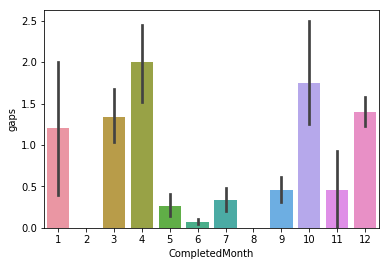

In [23]:
sns.barplot(y = 'gaps', x = 'CompletedMonth',data = dat3)

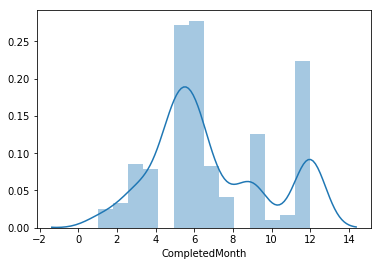

In [24]:
sns.distplot(dat3['CompletedMonth'])

In [25]:
dat3['CompletedMonth'].value_counts()

6     218
5     214
12    176
9      99
3      67
7      65
4      62
8      32
2      26
1      20
11     13
10      8
Name: CompletedMonth, dtype: int64

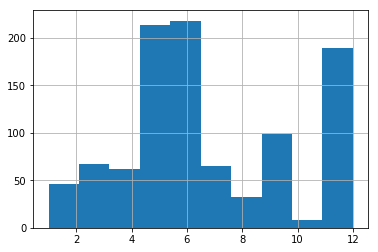

In [26]:
dat3['CompletedMonth'].hist()

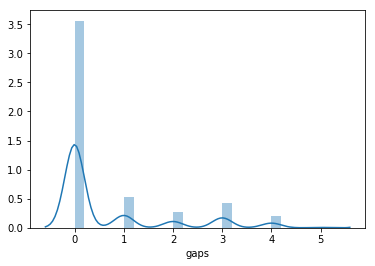

In [27]:
sns.distplot(dat3['gaps'])

In [28]:
dat3['gaps'].value_counts()

0    712
1    106
3     85
2     54
4     40
5      3
Name: gaps, dtype: int64

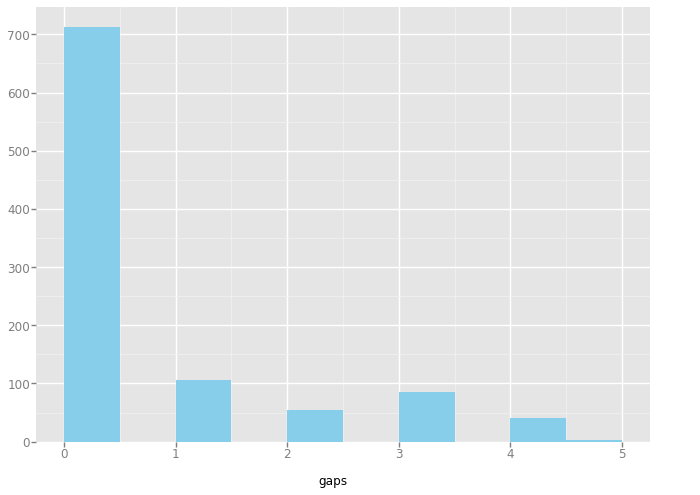

<ggplot: (160584293296)>

In [29]:
ggplot(dat3,aes('gaps')) + geom_histogram(fill = 'skyblue')

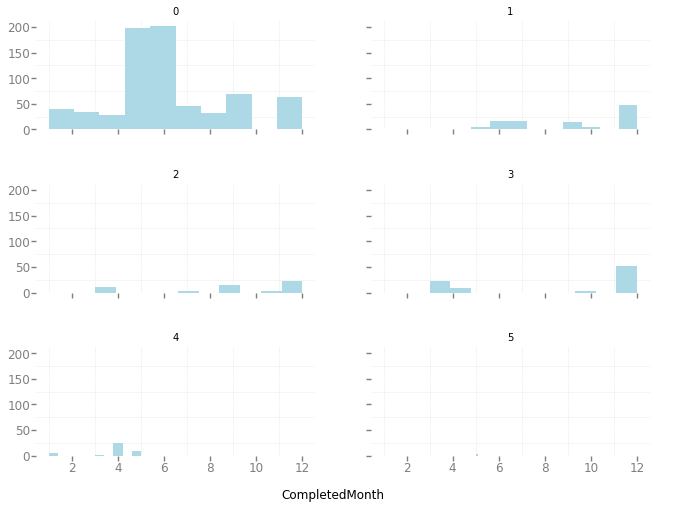

<ggplot: (160583988053)>

In [30]:
ggplot(dat3, aes('CompletedMonth')) + geom_histogram(fill = 'lightblue') + facet_wrap('gaps') + theme_bw()

In [31]:
pd.isnull(dat3).any(axis = 0)

businessID        False
traingID          False
Credits           False
quarterID         False
CompletedMonth    False
traingFormatID     True
GenNum             True
earliest          False
gaps              False
dtype: bool

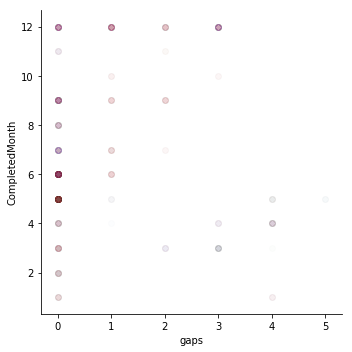

In [32]:
sns.lmplot(x = 'gaps', y = 'CompletedMonth',data = dat3,fit_reg= False,hue = 'Credits',scatter_kws= {'alpha':0.01},legend=False)

In [33]:
pd.isnull(dat3).any(axis = 0)

businessID        False
traingID          False
Credits           False
quarterID         False
CompletedMonth    False
traingFormatID     True
GenNum             True
earliest          False
gaps              False
dtype: bool

In [34]:
dat3.apply(pd.notnull).any(axis = 0)

businessID        True
traingID          True
Credits           True
quarterID         True
CompletedMonth    True
traingFormatID    True
GenNum            True
earliest          True
gaps              True
dtype: bool

In [35]:
dat3.head()

,businessID,traingID,Credits,quarterID,CompletedMonth,traingFormatID,GenNum,earliest,gaps
0,1000000603,30477,5,9,3,NaN,NaN,9,0
1,1000000603,207232,15,10,5,NaN,NaN,9,1
2,1000000603,207237,6,10,5,NaN,NaN,9,1
3,1000000603,207238,12,10,5,NaN,NaN,9,1
4,1000000649,22692,5,13,1,NaN,NaN,13,0


In [36]:
def strip_3(s):
    
    s = str(s)
    
    return int(s[-5:])

In [37]:
dat3['code'] = dat3['businessID'].apply(strip_3)

In [38]:
dat3.tail()

,businessID,traingID,Credits,quarterID,CompletedMonth,traingFormatID,GenNum,earliest,gaps,code
995,1000210786,30441,2,10,5,NaN,NaN,10,0,10786
996,1000210786,20361,2,10,5,12.0,0.0,10,0,10786
997,1000210786,21978,6,10,5,NaN,NaN,10,0,10786
998,1000210786,29785,6,10,5,NaN,NaN,10,0,10786
999,1000210786,17656,2,10,5,3.0,0.0,10,0,10786


In [39]:
dat3['newcode'] = dat3['businessID'].apply(lambda x: int(str(x)[-5:]))

In [40]:
dat3.tail()

,businessID,traingID,Credits,quarterID,CompletedMonth,traingFormatID,GenNum,earliest,gaps,code,newcode
995,1000210786,30441,2,10,5,NaN,NaN,10,0,10786,10786
996,1000210786,20361,2,10,5,12.0,0.0,10,0,10786,10786
997,1000210786,21978,6,10,5,NaN,NaN,10,0,10786,10786
998,1000210786,29785,6,10,5,NaN,NaN,10,0,10786,10786
999,1000210786,17656,2,10,5,3.0,0.0,10,0,10786,10786


In [41]:
dat3['lagged_tID'] = dat3['traingID'].shift(-1)

In [42]:
dat3.head()

,businessID,traingID,Credits,quarterID,CompletedMonth,traingFormatID,GenNum,earliest,gaps,code,newcode,lagged_tID
0,1000000603,30477,5,9,3,NaN,NaN,9,0,603,603,207232.0
1,1000000603,207232,15,10,5,NaN,NaN,9,1,603,603,207237.0
2,1000000603,207237,6,10,5,NaN,NaN,9,1,603,603,207238.0
3,1000000603,207238,12,10,5,NaN,NaN,9,1,603,603,22692.0
4,1000000649,22692,5,13,1,NaN,NaN,13,0,649,649,22709.0


In [43]:
#Timeseries Items

In [44]:
from urllib.request import urlretrieve

FREMONT_URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'
urlretrieve(FREMONT_URL, 'Fremont.csv')
data = pd.read_csv('Fremont.csv', index_col='Date')
data.index = pd.to_datetime(data.index)

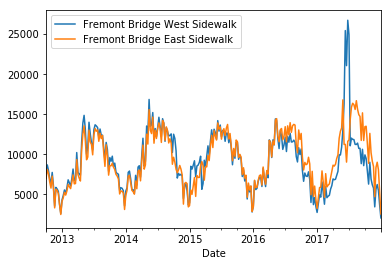

In [45]:
data.resample('W').sum().plot()

In [46]:
data.columns = ['West','East']


In [47]:
data['Total'] = data.West + data.East

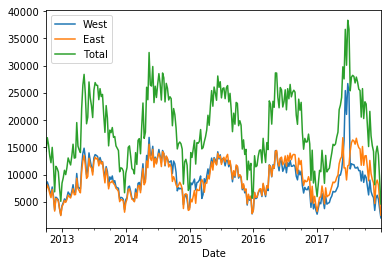

In [48]:
data.resample('W').sum().plot()

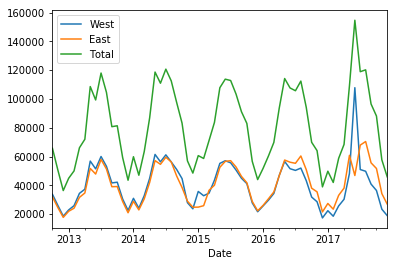

In [49]:
data.resample('M').sum().plot()

In [50]:
pivoted = data.pivot_table('Total',index = data.index.time,columns = data.index.date)

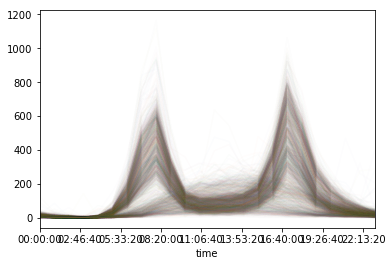

In [51]:
pivoted.plot(alpha = 0.01,legend = False)